#### IMPORTS

In [2]:
# IMPORT STAT TOOLS
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# IMPORT PLOTTING
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# CHANGE FIGURE SIZE
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12

# IMPORT OTHER
import os

#### HANDY

In [129]:
# df.loc[(df!=0).any(axis=1)]         DROPS ROWS WITH ALL ZEROS COLUMNS

##### VARIABLES

In [5]:
# PATHS
input_filepath = 'D:\\Data\\'
output_filepath = input_filepath
tshark = '"C:\\Program Files\\Wireshark\\tshark.exe"'

# FILENAME
in_filename = 'n.pcap'
out_filename = 'n.csv'

# TSHARK PARAMS
read = ' -r '
output_params = ' -E header=y -E separator=, -E occurrence=f -E quote=d -t u >'
fields_select = ' -T fields             \
                    -e frame.number     \
                    -e frame.time_epoch \
                    -e frame.len        \
                    -e ip.src           \
                    -e ip.dst           \
                    -e ip.ttl           \
                    -e tcp.srcport      \
                    -e tcp.dstport      \
                    -e tcp.flags        \
                    -e tcp.seq          \
                    -e tcp.stream       \
                    -e udp.srcport      \
                    -e udp.dstport      \
                    -e icmp.type        \
                    -e icmp.code'



#### FUNCTIONS

In [4]:
def ip2str(ip_string):
    """Convert IP from dot octet notation to single decimal"""
    ip_arr = ip_string.split(".")
    if len(ip_arr) == 4:
        for octet in ip_arr:
            if len(octet.strip(" ")) > 0:
                result = int(ip_arr[0]) * 256 * 256 * 256 + \
                       int(ip_arr[1]) * 256 * 256 + \
                       int(ip_arr[2]) * 256 + \
                       int(ip_arr[3])
                if result > 4294967295 or result < 0:
                    print("[ERR] IP out of IPv4 range detected.", ip_string)
                    return -1
                else:
                    return result

            else:
                print("[ERR] Missing octets detected.", ip_string)
                return -1
    else:
        print("[ERR] Provided IP", ip_string, "does not contain 4 octets.")
        return -1

#### PROCESSING PCAP FILE

In [6]:
result = os.system(
    tshark + 
    read + 
    input_filepath + 
    in_filename + 
    fields_select + 
    output_params + 
    output_filepath + 
    out_filename
)

if result == 0:
    print('PCAP FILE PROCESSED')
else:
    print('WARNING! FILE NOT PROCESSED')

PCAP FILE PROCESSED


#### GETTING DATA

In [21]:
dframe = pd.read_csv('D:\\Data\\n.csv')

In [55]:
def ip_column_replace(series):
    result = []
    for ip in series:
        str_ip = str(ip)
        if str_ip != 'nan':
            result.append(ip2str(str_ip))
        else:
            result.append(0)
    return result

In [61]:
print(ip_column_replace(dframe['ip.src'].values))

None


In [62]:
dframe['ip.src'].values

array([nan, '192.168.0.1', '192.168.0.1', ..., '192.168.0.1',
       '192.168.0.1', nan], dtype=object)

In [63]:
d = dframe['ip.src'].values

In [64]:
s = Series(d)

In [67]:
print(ip_column_replace(s.values))

None


In [69]:
r = ip_column_replace(s.values)

In [79]:
r = []

In [80]:
for ip in dframe['ip.src']:
    if str(ip) != "nan":
        s = ip2str(str(ip))
        r.append(s)
    else:
        r.append(0)

In [84]:
dframe.replace(to_replace=dframe['ip.src'].values, value=r  )

,frame.number,frame.time_epoch,frame.len,ip.src,ip.dst,ip.ttl,tcp.srcport,tcp.dstport,tcp.flags,tcp.seq,tcp.stream,udp.srcport,udp.dstport,icmp.type,icmp.code
0,1,1.358009e+09,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.358009e+09,342,192.168.0.1,239.255.255.250,4,NaN,NaN,NaN,NaN,NaN,1901,1900,NaN,NaN
2,3,1.358009e+09,398,192.168.0.1,239.255.255.250,4,NaN,NaN,NaN,NaN,NaN,1901,1900,NaN,NaN
3,4,1.358009e+09,326,192.168.0.1,239.255.255.250,4,NaN,NaN,NaN,NaN,NaN,1901,1900,NaN,NaN
4,5,1.358009e+09,318,192.168.0.1,239.255.255.250,4,NaN,NaN,NaN,NaN,NaN,1901,1900,NaN,NaN


In [86]:
dframe['frame.len'][0]

60

In [88]:
dframe['ip.src'][2]

'192.168.0.1'

In [89]:
s = Series([1,2,2,2,2,1])

In [91]:
s.unique()

array([1, 2], dtype=int64)

In [92]:
to_repl = Series(dframe['ip.src'].values).unique()

In [93]:
to_repl

array([nan, '192.168.0.1', '192.168.0.11', '0.0.0.0', '192.168.0.12',
       '192.168.0.10', '192.168.0.7', '192.168.0.5', '192.168.0.3',
       '192.168.0.200', '122.154.101.54', '192.168.0.6', '130.75.16.5',
       '92.240.68.152', '194.168.4.100', '87.98.246.8', '216.137.63.121',
       '159.148.96.184', '91.189.92.190', '91.189.88.33', '91.189.91.15',
       '46.51.197.89', '91.189.90.40', '62.252.170.91', '91.189.89.88',
       '216.137.63.137', '46.51.197.88', '91.189.90.41', '62.252.170.81',
       '169.254.56.55', '87.230.23.162', '91.189.91.14', '1.234.31.20',
       '192.168.0.2'], dtype=object)

In [94]:
r = []
for ip in to_repl:
    if str(ip) != "nan":
        s = ip2str(str(ip))
        r.append(s)
    else:
        r.append(0)

In [95]:
d2 = dframe.replace(to_replace=to_repl, value=r)

In [98]:
to_repl2 = Series(dframe['ip.dst'].values).unique()

In [99]:
r2 = []
for ip in to_repl2:
    if str(ip) != "nan":
        s = ip2str(str(ip))
        r2.append(s)
    else:
        r2.append(0)

In [100]:
d3 = d2.replace(to_replace=to_repl2, value=r2)

In [101]:
d3

,frame.number,frame.time_epoch,frame.len,ip.src,ip.dst,ip.ttl,tcp.srcport,tcp.dstport,tcp.flags,tcp.seq,tcp.stream,udp.srcport,udp.dstport,icmp.type,icmp.code
0,1,1.358009e+09,60,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1.358009e+09,342,3232235521,4026531834,4,0,0,0,0,0,1901,1900,0,0
2,3,1.358009e+09,398,3232235521,4026531834,4,0,0,0,0,0,1901,1900,0,0
3,4,1.358009e+09,326,3232235521,4026531834,4,0,0,0,0,0,1901,1900,0,0
4,5,1.358009e+09,318,3232235521,4026531834,4,0,0,0,0,0,1901,1900,0,0
5,6,1.358009e+09,362,3232235521,4026531834,4,0,0,0,0,0,1901,1900,0,0
6,7,1.358009e+09,338,3232235521,4026531834,4,0,0,0,0,0,1901,1900,0,0
7,8,1.358009e+09,392,3232235521,4026531834,4,0,0,0,0,0,1901,1900,0,0
8,9,1.358009e+09,60,0,0,0,0,0,0,0,0,0,0,0,0
9,10,1.358009e+09,405,3232235521,4026531834,1,0,0,0,0,0,1900,1900,0,0


In [127]:
data_ip = DataFrame(d3, columns=['ip.src', 'ip.dst', 'ip.ttl'])

In [134]:

data_ip.drop_duplicates(subset=['ip.src'], inplace=True)
data_ip

,ip.src,ip.dst,ip.ttl
0,0,0,0
1,3232235521,4026531834,4
21,3232235531,3758096406,1
104,3232235532,3232235775,64
119,3232235530,3758096406,1
222,3232235527,3758096406,1
249,3232235525,3758096406,1
371,3232235523,3758096406,1
769,3232235720,3758096635,255
2601,2056938806,3232235720,44


In [136]:
#df,values='count',index='site_id',cols='week'

pivo = data_ip.pivot(index='ip.src', columns='ip.dst', values='ip.ttl')

In [138]:
pivo.fillna(0, inplace=True)

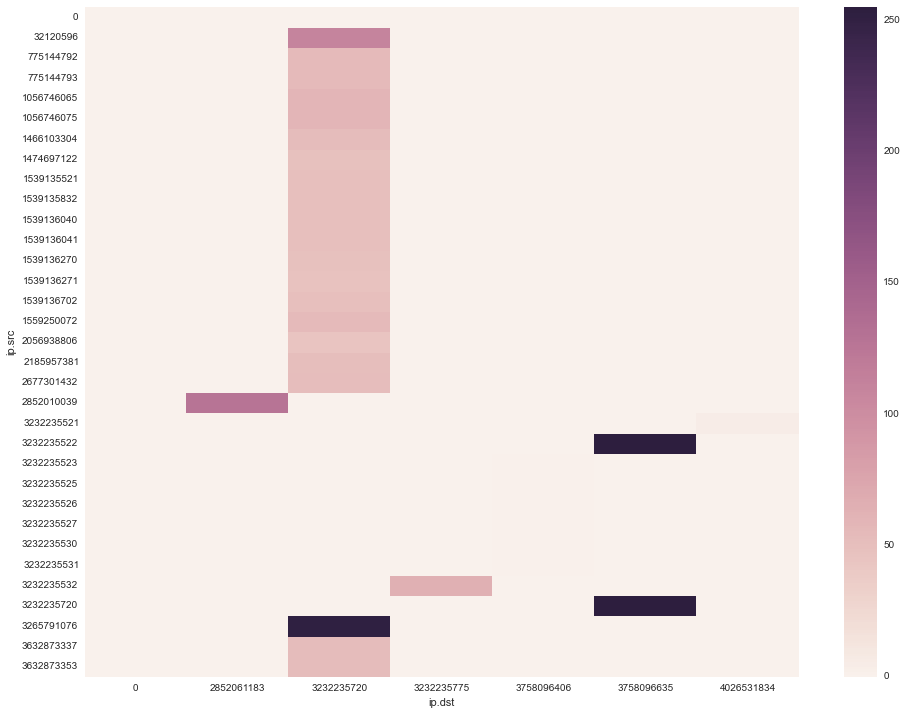

In [140]:
sns.heatmap(pivo)

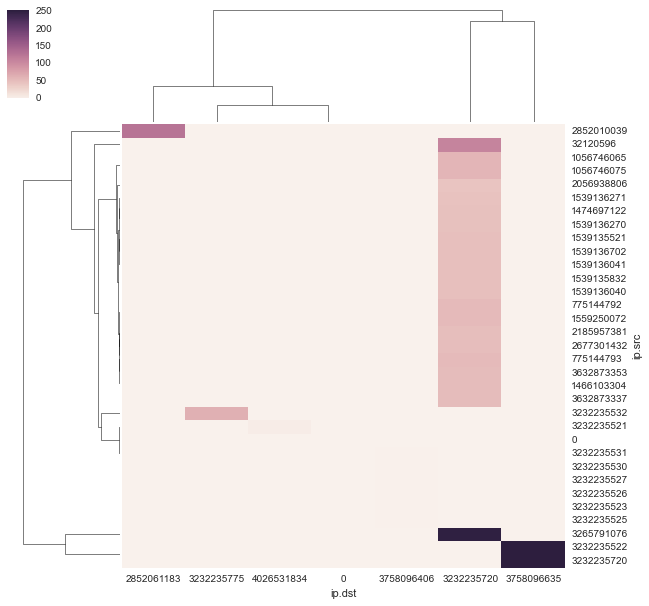

In [146]:
sns.clustermap(pivo)

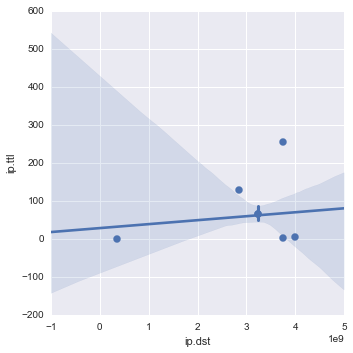

In [151]:
sns.lmplot('ip.dst', 'ip.ttl', data_ip, x_bins=256)

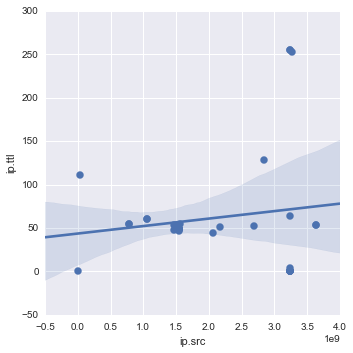

In [152]:
sns.lmplot('ip.src', 'ip.ttl', data_ip, x_bins=256)

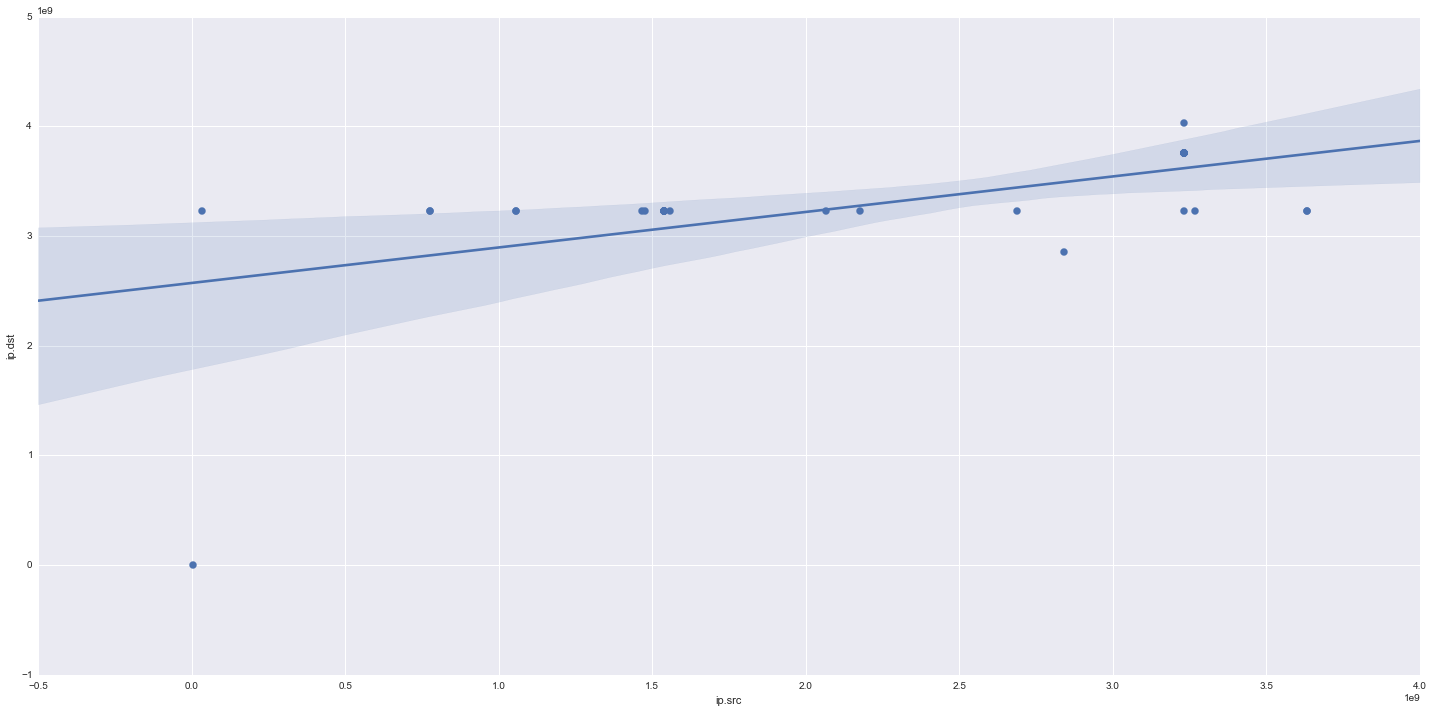

In [175]:
sns.lmplot('ip.src', 'ip.dst', data_ip , x_bins=256,x_jitter=.4, scatter_kws={'marker':'x', 'label':'points'}, size=10, aspect=2)

In [164]:
dd = DataFrame(data_ip, columns=['ip.src', 'ip.dst'])

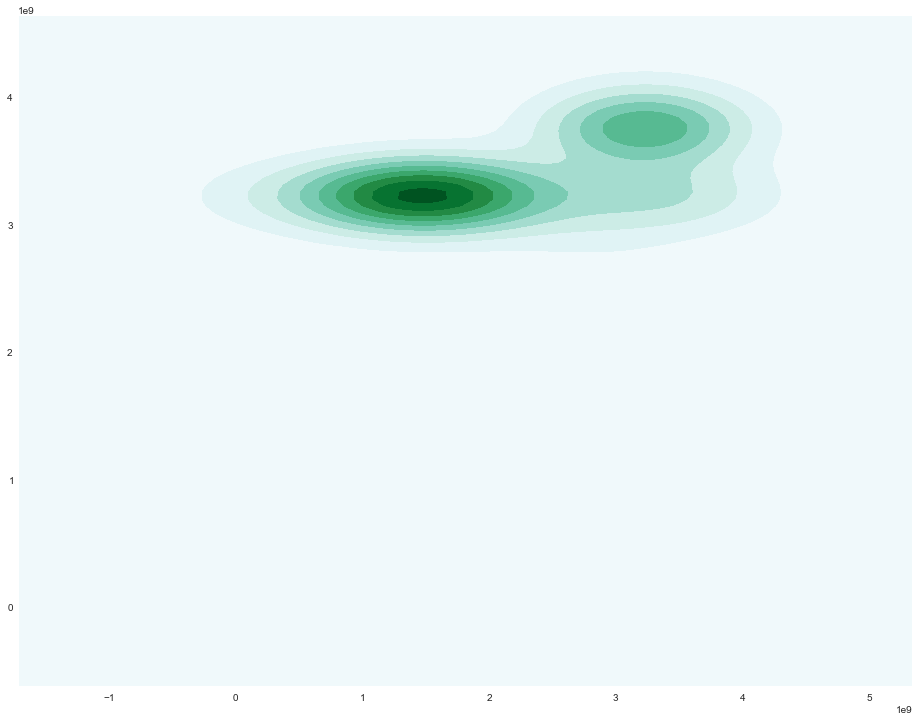

In [173]:
sns.kdeplot(dd, shade=True)